### Goldsmiths University of London
### Author....: Carlos Manuel de Oliveira Alves
### Student...: cdeol003
### Created...: 24/02/2023
### FYP.......: NeuroCredit

In [45]:
# Import libraries to split the dataset into training and test sets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset with random data with loan records
df = pd.read_csv("data.csv")

# Encode categorical variables from the dataset
df_encoded = pd.get_dummies(df)

# Split dataset into training and testing sets
X = df_encoded.drop(["approval_status_Approved", "approval_status_Rejected"], axis=1)
y = df_encoded["approval_status_Approved"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Predict the approval status for new input variables - test data 1
# Good,Employed,Other,Excellent,Mortgage,Other,Other,34017,18704,73,13,2,5,0,6316,6875,22,2067,5985,Approved
new_data = pd.DataFrame({
    'credit_history': 'Good',
    'employment_status': 'Employed',
    'collateral': 'Other',
    'payment_history': 'Excellent',
    'type_of_credit_accounts': 'Mortgage',
    'public_records_and_collections': 'Other',
    'purpose_of_loan': 'Other',
    'income': 34017,
    'assets_value': 18704,
    'debt_to_income_ratio': 73,
    'length_of_credit_history': 13,
    'number_of_credit_inquiries': 2,
    'number_of_credit_accounts': 5,
    'number_of_credit_accounts_opened_last_12_months': 0,
    'current_balance_of_credit_accounts': 6316,
    'total_credit_limit': 6875,
    'total_credit_utilization': 22,
    'loan_amount': 2067,
    'saving_account_balance': 5985
}, index=[0])

# Encode the new data
new_data_encoded = pd.get_dummies(new_data)

# Ensure that new_data_encoded has the same columns as X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Scale the new data
new_data_scaled = scaler.transform(new_data_encoded)

# Predict the approval status
approval_prediction = lr.predict(new_data_scaled)
approval_probability = lr.predict_proba(new_data_scaled)[:, 1]

# Print the approval prediction
if approval_prediction == 0:
    print(">> The loan is approved")
else:
    print(">> The loan is rejected")

# Print the approval probability
print("Approval Probability..: {:.2f}%".format(approval_probability.item() * 100))

# Evaluate the model accuracy
print("Accuracy of the Model.: {:.2f}%".format(lr.score(X_test_scaled, y_test) * 100))


>> The loan is approved
Approval Probability..: 47.89%
Accuracy of the Model.: 87.00%


>> The loan is approved
Approval Probability..: 8.84%
Accuracy of the Model.: 87.00%
[[242  23]
 [ 16  19]]


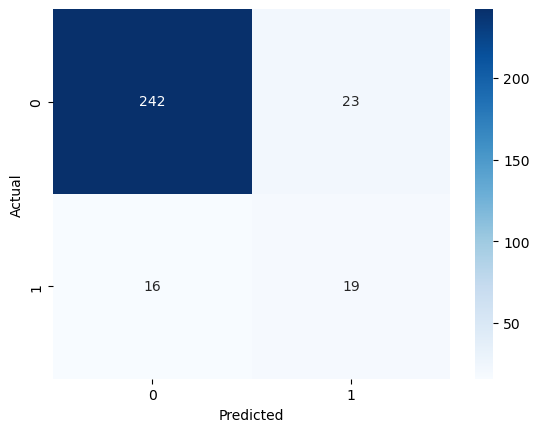

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       265
           1       0.45      0.54      0.49        35

    accuracy                           0.87       300
   macro avg       0.70      0.73      0.71       300
weighted avg       0.88      0.87      0.88       300



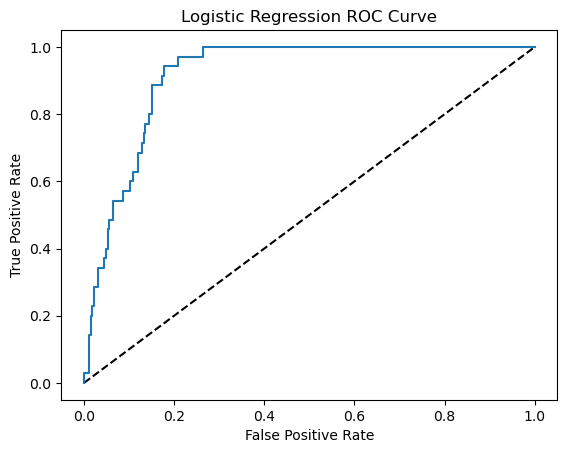

In [52]:
# Import libraries to split the dataset into training and test sets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset with random data with loan records
df = pd.read_csv("data.csv")

# Encode categorical variables from the dataset
df_encoded = pd.get_dummies(df)

# Split dataset into training and testing sets
X = df_encoded.drop(["approval_status_Approved", "approval_status_Rejected"], axis=1)
y = df_encoded["approval_status_Approved"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Predict the approval status for new input variables - test data 2
# Good,Self-Employed,House,Fair,Personal,Bankruptcy,Debt Consolidation,12769,12859,91,27,4,1,0,7840,17289,50,3130,4953,Rejected
new_data = pd.DataFrame({
    'credit_history': 'Good',
    'employment_status': 'Self-Employed',
    'collateral': 'House',
    'payment_history': 'Fair',
    'type_of_credit_accounts': 'Personal',
    'public_records_and_collections': 'Bankruptcy',
    'purpose_of_loan': 'Debt Consolidation',
    'income': 12769,
    'assets_value': 12859,
    'debt_to_income_ratio': 91,
    'length_of_credit_history': 27,
    'number_of_credit_inquiries': 4,
    'number_of_credit_accounts': 1,
    'number_of_credit_accounts_opened_last_12_months': 0,
    'current_balance_of_credit_accounts': 7840,
    'total_credit_limit': 17289,
    'total_credit_utilization': 50,
    'loan_amount': 3130,
    'saving_account_balance': 4953
}, index=[0])

# Encode the new data
new_data_encoded = pd.get_dummies(new_data)

# Ensure that new_data_encoded has the same columns as X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Scale the new data
new_data_scaled = scaler.transform(new_data_encoded)

# Predict the approval status
approval_prediction = lr.predict(new_data_scaled)
approval_probability = lr.predict_proba(new_data_scaled)[:, 1]

# Print the approval prediction
if approval_prediction == 0:
    print(">> The loan is approved")
else:
    print(">> The loan is rejected")

# Print the approval probability
print("Approval Probability..: {:.2f}%".format(approval_probability.item() * 100))

# Evaluate the model accuracy
print("Accuracy of the Model.: {:.2f}%".format(lr.score(X_test_scaled, y_test) * 100))

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=2, output_dict=False, target_names=None))

# Print the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

>> The loan is rejected
Approval Probability..: 66.63%
Accuracy of the Model.: 87.00%
[[242  23]
 [ 16  19]]


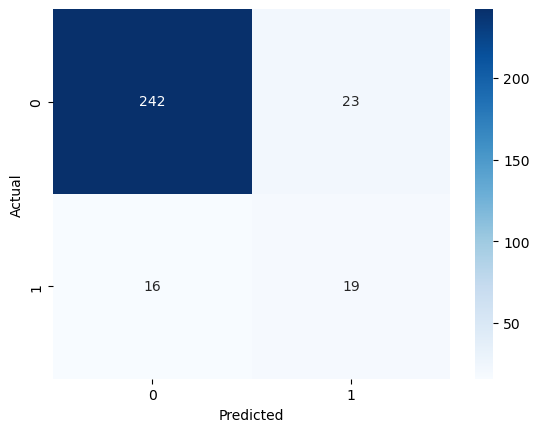

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       265
           1       0.45      0.54      0.49        35

    accuracy                           0.87       300
   macro avg       0.70      0.73      0.71       300
weighted avg       0.88      0.87      0.88       300



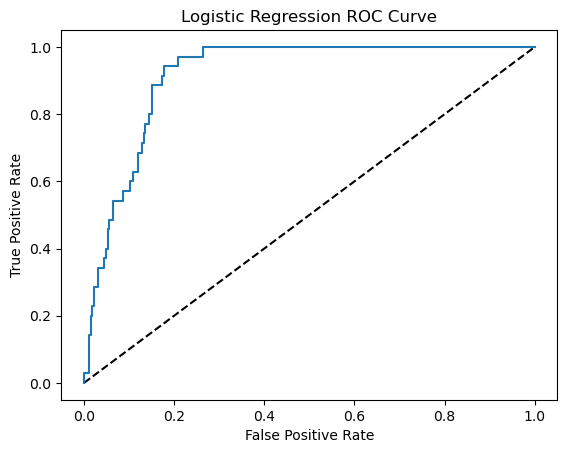

In [53]:
# Import libraries to split the dataset into training and test sets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset with random data with loan records
df = pd.read_csv("data.csv")

# Encode categorical variables from the dataset
df_encoded = pd.get_dummies(df)

# Split dataset into training and testing sets
X = df_encoded.drop(["approval_status_Approved", "approval_status_Rejected"], axis=1)
y = df_encoded["approval_status_Approved"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Predict the approval status for new input variables - test data 3
# Good,Employed,Other,Poor,Student,None,Home Improvement,18561,23741,12,100,1,4,2,18277,18047,33,2411,16367,Approved
new_data = pd.DataFrame({
    'credit_history': 'Good',
    'employment_status': 'Employed',
    'collateral': 'Other',
    'payment_history': 'Poor',
    'type_of_credit_accounts': 'Student',
    'public_records_and_collections': 'None',
    'purpose_of_loan': 'Home Improvement',
    'income': 18561,
    'assets_value': 23741,
    'debt_to_income_ratio': 12,
    'length_of_credit_history': 100,
    'number_of_credit_inquiries': 1,
    'number_of_credit_accounts': 4,
    'number_of_credit_accounts_opened_last_12_months': 2,
    'current_balance_of_credit_accounts': 18277,
    'total_credit_limit': 18047,
    'total_credit_utilization': 33,
    'loan_amount': 2411,
    'saving_account_balance': 16367
}, index=[0])

# Encode the new data
new_data_encoded = pd.get_dummies(new_data)

# Ensure that new_data_encoded has the same columns as X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Scale the new data
new_data_scaled = scaler.transform(new_data_encoded)

# Predict the approval status
approval_prediction = lr.predict(new_data_scaled)
approval_probability = lr.predict_proba(new_data_scaled)[:, 1]

# Print the approval prediction
if approval_prediction == 0:
    print(">> The loan is approved")
else:
    print(">> The loan is rejected")

# Print the approval probability
print("Approval Probability..: {:.2f}%".format(approval_probability.item() * 100))

# Evaluate the model accuracy
print("Accuracy of the Model.: {:.2f}%".format(lr.score(X_test_scaled, y_test) * 100))

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=2, output_dict=False, target_names=None))

# Print the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()